# Result

## Dependencies

In [9]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Constant

In [10]:
EVALUATION_PATH = os.path.join(os.getcwd(), "evaluation.csv")
PREDICTION_PATH = os.path.join(os.getcwd(), "prediction.csv")

## Visualization

### Evaluation

     Model     MAE     MSE      R2
0       RF  0.0076  0.0002  0.9956
1       LR  0.0321  0.0018  0.9497
2       GB  0.0090  0.0002  0.9943
3      SVR  0.0318  0.0015  0.9583
4  XGBoost  0.0048  0.0000  0.9988


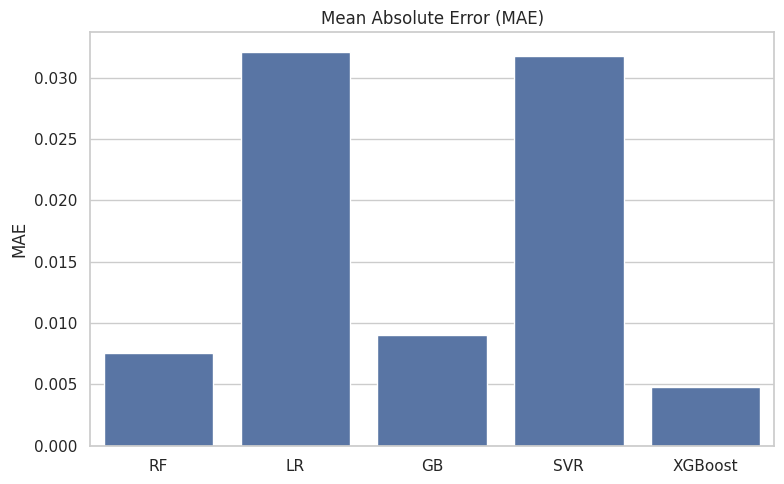

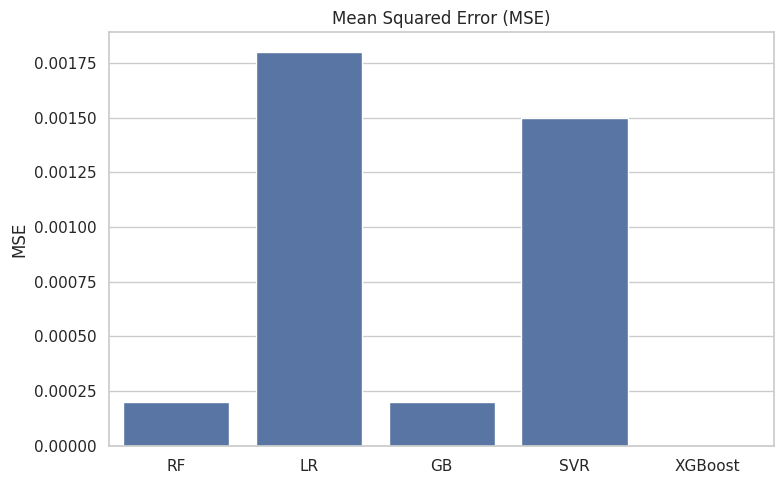

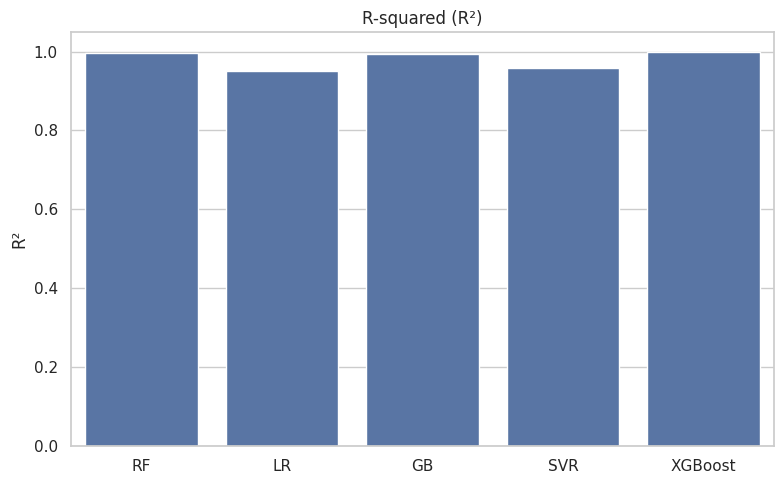

In [11]:
# Load DataFrame
df = pd.read_csv(EVALUATION_PATH)
df["Model"] = df["Model"].replace({
    "Random Forest": "RF",
    "Linear Regression": "LR",
    "Gradient Boosting": "GB",
    "Support Vector Regression": "SVR",
    "XGBoost Regressor": "XGBoost"
})
# Round values to 4 decimal places
df = df.round(4)
print(df)

# Set plot style
sns.set_theme(style="whitegrid")

# Plot MAE
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="MAE", data=df)
plt.title("Mean Absolute Error (MAE)")
plt.ylabel("MAE")
plt.xlabel("")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot MSE
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="MSE", data=df)
plt.title("Mean Squared Error (MSE)")
plt.ylabel("MSE")
plt.xlabel("")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot R²
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="R2", data=df)
plt.title("R-squared (R²)")
plt.ylabel("R²")
plt.xlabel("")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Prediction

/tmp/ipykernel_396427/2853989099.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_df["Bin"] = pd.cut(actual_df["Actual Score"], bins=bins, labels=labels, include_lowest=True)
/tmp/ipykernel_396427/2853989099.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["Bin"] = pd.cut(model_df["Predicted Score"], bins=bins, labels=labels, include_lowest=True)
/tmp/ipykernel_396427/2853989099.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Bin           < 40    40 - 60    60 - 80       > 80
Actual   11.570494  32.302201  29.060083  27.067222
RF       11.451517  32.480666  29.030339  27.037478
LR        8.806903  39.452544  25.766141  25.974412
GB       11.392029  32.510410  29.089827  27.007733
SVR       8.387864  39.886972  28.941106  22.784057
XGBoost  11.748959  32.064247  29.060083  27.126710


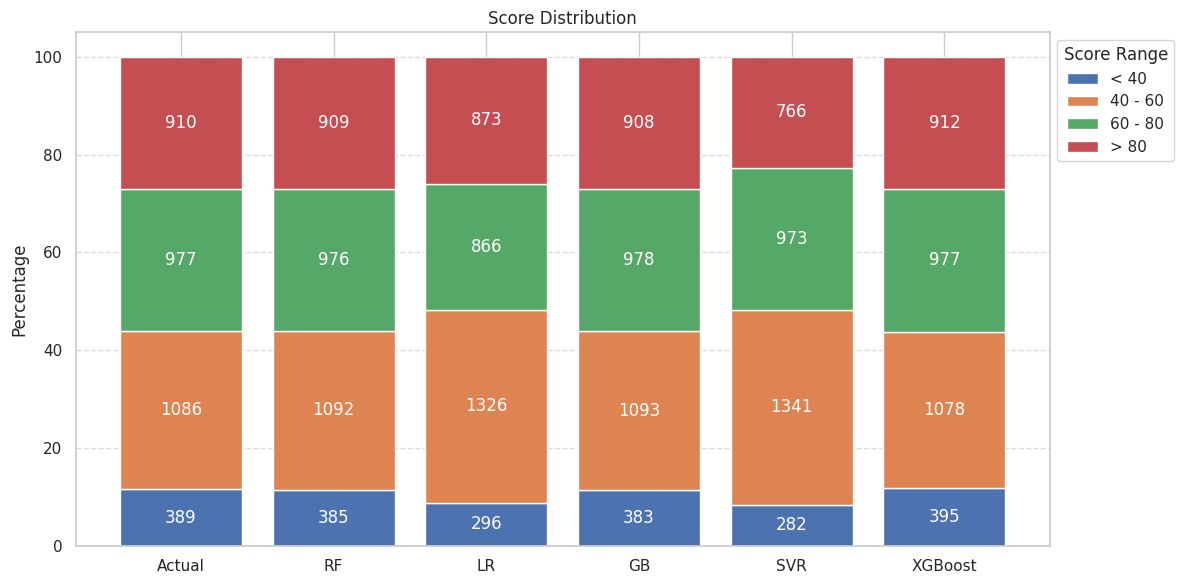

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your prediction data
df = pd.read_csv(PREDICTION_PATH)
df["Model"] = df["Model"].replace({
    "Random Forest": "RF",
    "Linear Regression": "LR",
    "Gradient Boosting": "GB",
    "Support Vector Regression": "SVR",
    "XGBoost Regressor": "XGBoost"
})

# Ensure Repo ID is treated as string
df["Repo ID"] = df["Repo ID"].astype(str)

# Convert scores to percentage scale
df["Actual Score"] = (df["Actual Score"] * 100).round(0)
df["Predicted Score"] = (df["Predicted Score"] * 100).round(0)

# Define bins and labels
bins = [0, 40, 60, 80, 100]
labels = ["< 40", "40 - 60", "60 - 80", "> 80"]

# Bin actual scores (only once per Repo)
actual_df = df.drop_duplicates(subset="Repo ID")
actual_df["Bin"] = pd.cut(actual_df["Actual Score"], bins=bins, labels=labels, include_lowest=True)
actual_counts = actual_df["Bin"].value_counts(normalize=True).sort_index() * 100

# Bin predicted scores per model
model_names = df["Model"].unique()
model_distributions = {"Actual": actual_counts}

for model in model_names:
    model_df = df[df["Model"] == model]
    model_df["Bin"] = pd.cut(model_df["Predicted Score"], bins=bins, labels=labels, include_lowest=True)
    model_counts = model_df["Bin"].value_counts(normalize=True).sort_index() * 100
    model_distributions[model] = model_counts

# Convert to DataFrame for plotting
dist_df = pd.DataFrame(model_distributions).T[labels]
print(dist_df)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Create bottom for stacking
bottom = pd.Series([0] * len(dist_df), index=dist_df.index)

# Loop through each bin/score range
for label in labels:
    values = dist_df[label]
    bars = ax.bar(dist_df.index, values, bottom=bottom, label=label)

    # Add count label (convert from % to approximate count)
    total_repos = len(actual_df)
    for rect, value in zip(bars, values):
        if value > 0:
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                rect.get_y() + height / 2,
                f"{int(round(value * total_repos / 100))}",  # approximate count
                ha='center',
                va='center',
                fontsize=12,
                color='white'
            )

    bottom += values

# Final touches
ax.set_ylabel("Percentage")
ax.set_title("Score Distribution")
ax.legend(title="Score Range", bbox_to_anchor=(1, 1), loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()